<a href="https://colab.research.google.com/github/PrateekCoder/lets_data_science/blob/main/AdaBoost_Powering_Predictive_Models_Through_Adaptive_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required Packages

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Load the Dataset

In [2]:
# Load the dataset
cancer = datasets.load_breast_cancer()

# Let's convert to dataframe for better visualization and manipulation
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                  columns= list(cancer['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Prepare the Dataset

In [3]:
# Selecting first 10 features for simplicity
selected_features = df.columns[:10]

# Separating features (X) and target (y)
X = df[selected_features]
y = df['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the ADA Boost Model

In [4]:
# Create AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Train AdaBoost classifier
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

## Make Prediction Using ADA Boost Model

In [5]:
# Making predictions
y_pred = adaboost.predict(X_test)

##Evaluate the Model

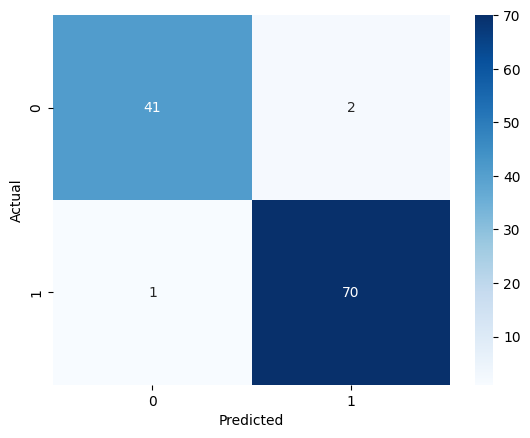

In [6]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
# Calculate accuracy
accuracy = adaboost.score(X_test, y_test)
print("Model accuracy: ", accuracy)

Model accuracy:  0.9736842105263158
